In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [21]:
img = cv2.imread('pic.jpg')
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

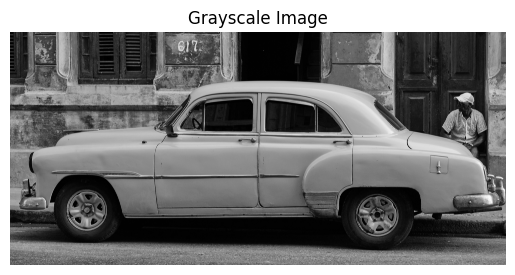

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

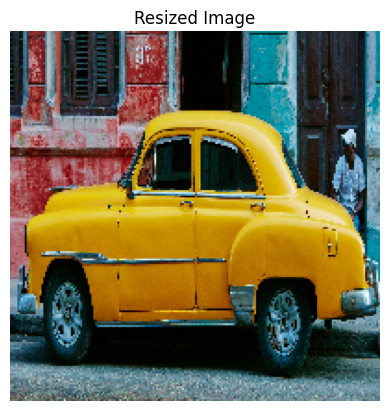

In [23]:
resized = cv2.resize(img, (200, 200))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()

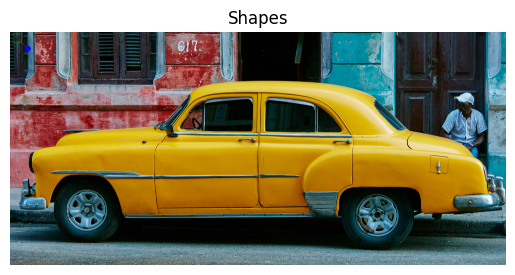

In [24]:
drawing = img.copy()
cv2.rectangle(drawing, (50, 50), (200, 200), (0, 255, 0), 3)
cv2.circle(drawing, (300, 300), 50, (255, 0, 0), -1)
cv2.line(drawing, (0, 0), (400, 400), (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(drawing, cv2.COLOR_BGR2RGB))
plt.title('Shapes')
plt.axis('off')
plt.show()

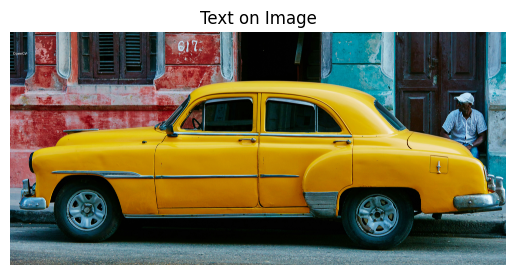

In [25]:
text_img = img.copy()
cv2.putText(text_img, 'OpenCV', (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
plt.imshow(cv2.cvtColor(text_img, cv2.COLOR_BGR2RGB))
plt.title('Text on Image')
plt.axis('off')
plt.show()

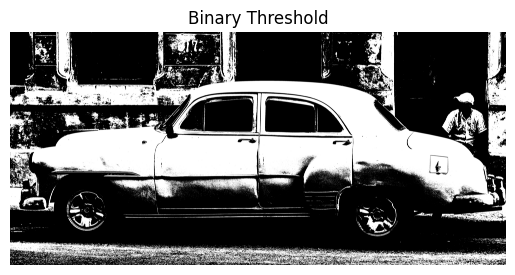

In [26]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')
plt.show()

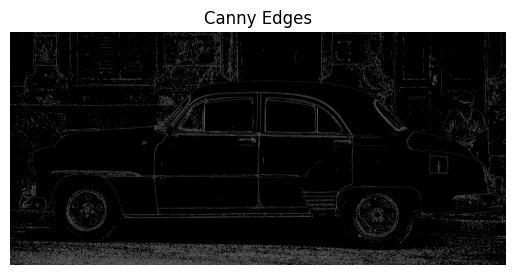

In [27]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()

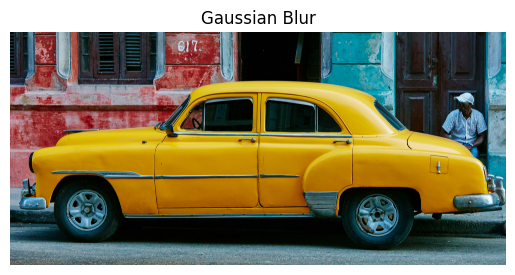

In [28]:
blur = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur')
plt.axis('off')
plt.show()

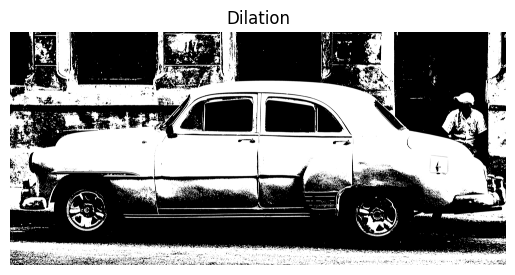

In [29]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations = 1)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')
plt.show()

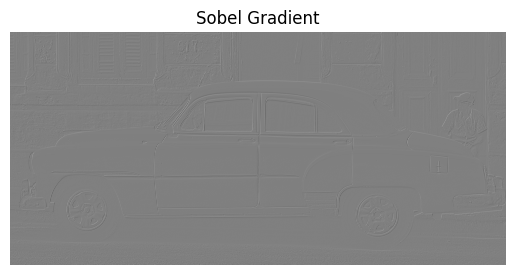

In [30]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobelx + sobely, cmap='gray')
plt.title('Sobel Gradient')
plt.axis('off')
plt.show()

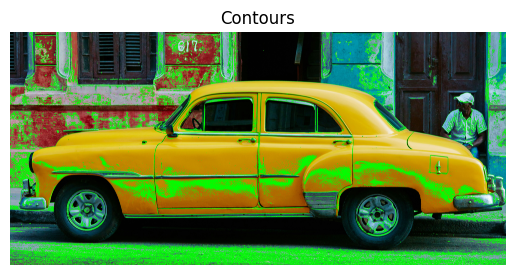

In [31]:
contour_img = img.copy()
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')
plt.show()

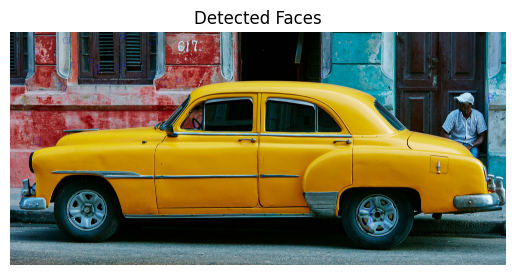

In [32]:
# Requires haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
face_img = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Faces')
plt.axis('off')
plt.show()

In [33]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('Webcam', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

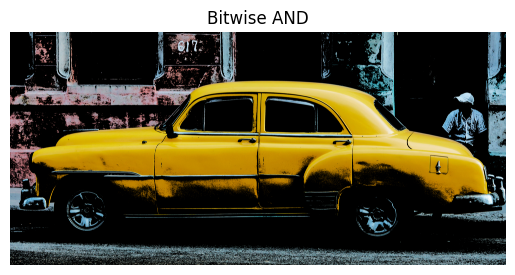

In [34]:
bitwise_and = cv2.bitwise_and(img, img, mask=thresh)
plt.imshow(cv2.cvtColor(bitwise_and, cv2.COLOR_BGR2RGB))
plt.title('Bitwise AND')
plt.axis('off')
plt.show()

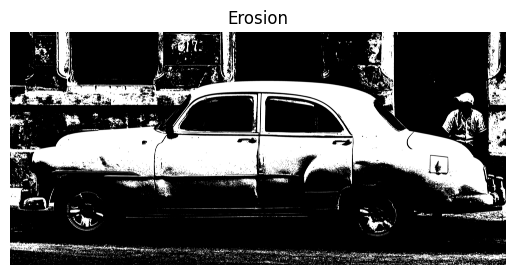

In [35]:
erosion = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')
plt.show()

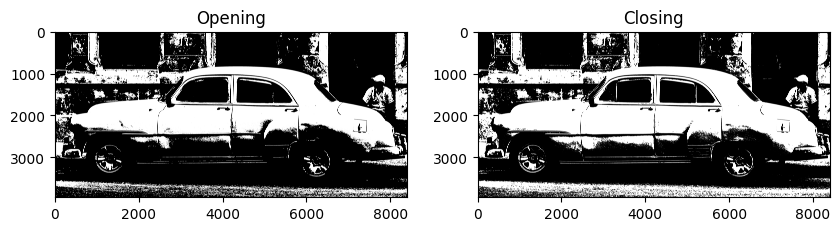

In [36]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.subplot(1,2,2)
plt.imshow(closing, cmap='gray')
plt.title('Closing')
plt.show()

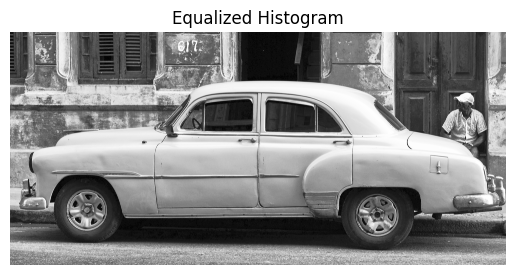

In [37]:
equalized = cv2.equalizeHist(gray)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Histogram')
plt.axis('off')
plt.show()